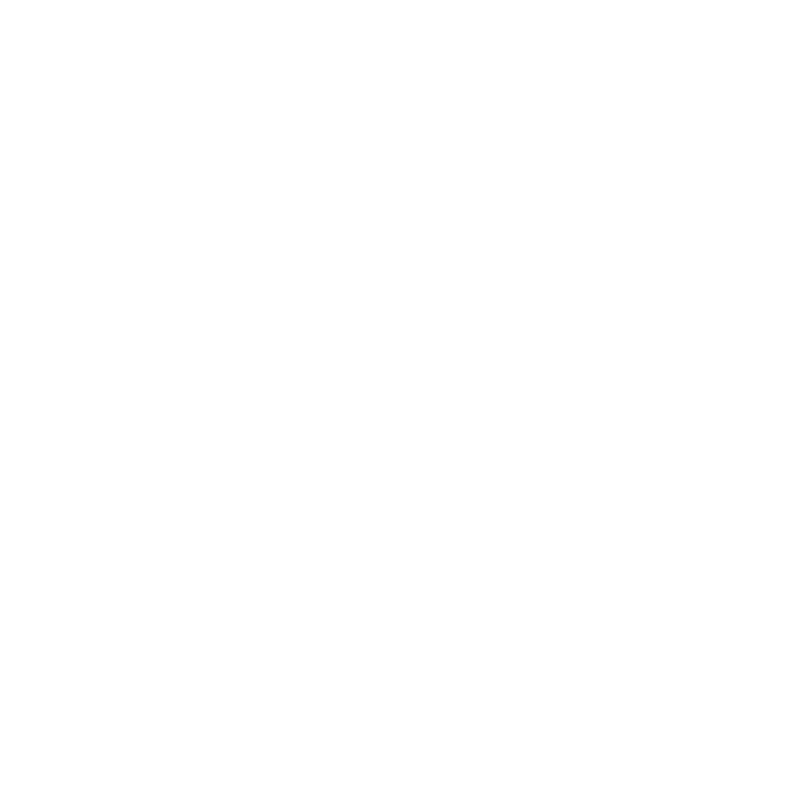

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle

def create_spiral_sequence(n):
    grid_size = int(np.ceil(np.sqrt(n)))
    x, y = grid_size // 2, grid_size // 2
    dx, dy = 0, -1
    sequence = []

    for num in range(1, n + 1):
        sequence.append((y, x, num))
        if not (0 <= x + dx < grid_size and 0 <= y + dy < grid_size) or any((a == y + dy and b == x + dx) for (a, b, _) in sequence):
            dx, dy = dy, -dx
        x += dx
        y += dy

    return grid_size, sequence

def animate_spiral(n):
    grid_size, sequence = create_spiral_sequence(n)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    ax.set_xlim(-1, grid_size)
    ax.set_ylim(-1, grid_size)  # Correct ylim to match xlim
    ax.set_axis_off()

    max_val = n
    cmap = plt.get_cmap('plasma')  # Updated colormap method
    artists = []

    def init():
        return artists

    def update(frame):
        if frame >= len(sequence):
            return []

        y, x, num = sequence[frame]
        color = cmap(num / max_val)
        circle = Circle((x, grid_size - 1 - y), 0.4, color=color, ec='black')
        text = ax.text(x, grid_size - 1 - y, str(num), ha='center', va='center', color='white', fontsize=8)
        ax.add_patch(circle)
        artists.append(circle)
        artists.append(text)

        # Ensure figure updates correctly
        fig.canvas.draw()
        fig.canvas.flush_events()

        return artists

    # Keep animation reference alive
    global anim
    anim = FuncAnimation(fig, update, frames=len(sequence), init_func=init, interval=50, blit=False)
    plt.show()

animate_spiral(100)


C:\Users\User\AppData\Local\Temp\ipykernel_16628\892338571.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


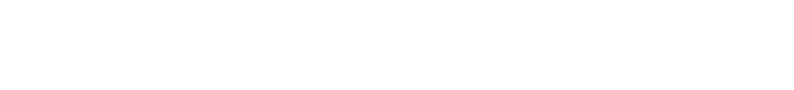

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Circle
import matplotlib.cm as cm

def create_spiral_sequence(n):
    grid_size = int(np.ceil(np.sqrt(n)))
    grid = np.zeros((grid_size,grid_size), dtype=int)
    x,y = grid_size // 2, grid_size // 2
    dx, dy =0,-1
    sequence = [] 

    for num in range(1, n + 1):
        sequence.append((y, x, num))
        if not (0 <= x + dx < grid_size and 0 <= y + dy < grid_size) or any ((a == y + dy and b == x + dx) for (a,b,_) in sequence):
            dx, dy = dy, -dx
        x += dx
        y += dy
    return grid_size, sequence

def animate_spiral(n):
    grid_size, sequence = create_spiral_sequence(n)
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.set_aspect('equal')
    ax.set_xlim(-1,grid_size)
    ax.set_xlim(-1,grid_size)
    ax.set_axis_off()

    max_val = n
    cmap = cm.get_cmap('plasma')
    artists = []

    def init():
        return[]

    def update(frame):
        if frame >= len(sequence):
            return[]

        y,x, num = sequence[frame]
        color = cmap(num/max_val)
        circle = Circle((x,grid_size - 1 - y), 0.4, color=color, ec='black')
        text =ax.text(x, grid_size -1 -y, str(num), ha='center', va='center', color='white', fontsize=8)
        ax.add_patch(circle)
        artists.append(circle)
        artists.append(text)
        return [circle, text]

    anim = FuncAnimation(fig,update, frames=len(sequence) + 10, init_func=init, interval=50, blit=True)
    plt.show()
animate_spiral(100)
    